In [160]:
import numpy as np
import matplotlib.pyplot as plt
import ipympl
import imageio.v3 as iio
import skimage.color
import skimage.filters
import skimage.measure

# Connected Component Analysis

In [161]:
def connected_components(filename, sigma=1.0, t=0.5, connectivity=2):
    # load the image
    image = iio.imread(filename)
    # convert the image to grayscale
    gray_image = skimage.color.rgb2gray(image)
    # denoise the image with a Gaussian filter
    blurred_image = skimage.filters.gaussian(gray_image, sigma=sigma)
    # mask the image according to threshold
    binary_mask = blurred_image < t
    # perform connected component analysis
    labeled_image, count = skimage.measure.label(binary_mask,
                                                 connectivity=connectivity, return_num=True)
    return labeled_image, count

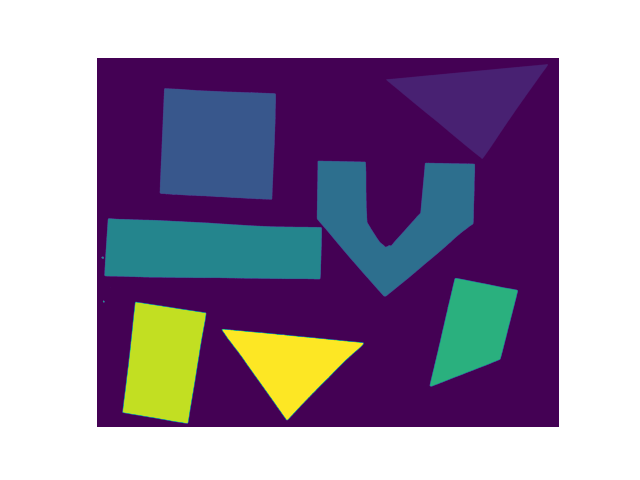

In [162]:
labeled_image, count = connected_components(filename="shapes-01.jpg", sigma=2.0, t=0.9, connectivity=2)
fig, ax = plt.subplots()
plt.imshow(labeled_image)
plt.axis("off")
plt.show()

In [163]:
count

11

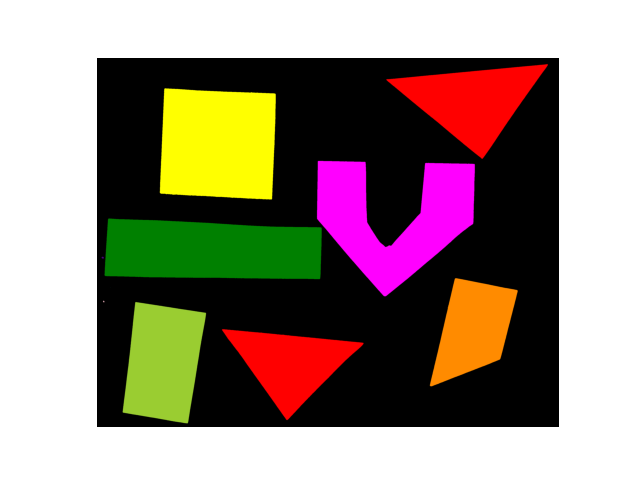

In [164]:
# convert the label image to color image
colored_label_image = skimage.color.label2rgb(labeled_image, bg_label=0)
fig, ax = plt.subplots()
plt.imshow(colored_label_image)
plt.axis("off");
plt.show()

In [165]:
print("Found", count, "objects in the image.")

Found 11 objects in the image.


In [166]:
num_objects = np.max(labeled_image)
print("Found", num_objects, "objects in the image.")

Found 11 objects in the image.


## Q3 Part I

Find the correct combination to get 7 objects

In [167]:
# Connectivity = 1
labeled_image, count = connected_components(filename="shapes-01.jpg", sigma=2.0, t=0.9, connectivity=1)
count

11

In [168]:
# t = 0.8, connectivity = 1
labeled_image, count = connected_components(filename="shapes-01.jpg", sigma=2.0, t=0.8, connectivity=1)
count

10

In [169]:
# sigma = 4, t = 0.8, connectivity = 1
labeled_image, count = connected_components(filename="shapes-01.jpg", sigma=4.0, t=0.8, connectivity=1)
count

7

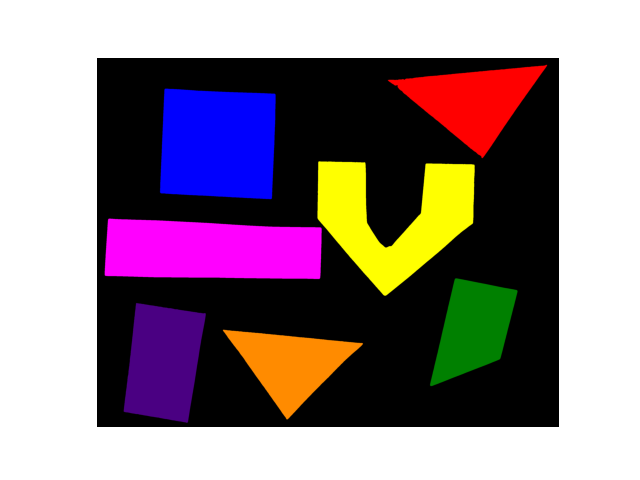

In [170]:
# convert the label image to color image
colored_label_image = skimage.color.label2rgb(labeled_image, bg_label=0)
fig, ax = plt.subplots()
plt.imshow(colored_label_image)
plt.axis("off");
plt.show()

In [171]:
print("Found", count, "objects in the image.")

Found 7 objects in the image.


# Morphometrics

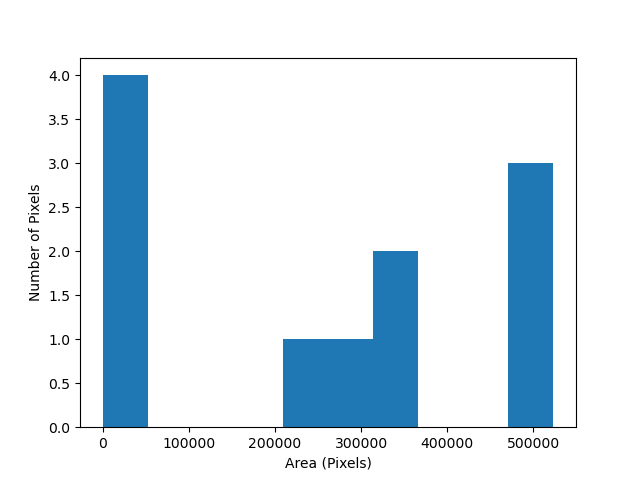

In [172]:
# compute object features and extract object areas
labeled_image, count = connected_components(filename="shapes-01.jpg", sigma=2.0, t=0.9, connectivity=2)
object_features = skimage.measure.regionprops(labeled_image)
object_areas = [objf["area"] for objf in object_features]
object_areas
fig, ax = plt.subplots()
plt.hist(object_areas)
plt.xlabel('Area (Pixels)')
plt.ylabel('Number of Pixels')
plt.show()

The figure above shows that 4 of the objects are small compared to the other objects that are greater than 200,000 pixels in area.

In [173]:
min_area = 200
object_areas = np.array([objf["area"] for objf in object_features])
object_labels = np.array([objf["label"] for objf in object_features])

In [174]:
# Method 1
large_objects = object_labels[object_areas > min_area]
print("Found", len(large_objects), "objects!")

Found 7 objects!


In [175]:
# Method 2
n = np.count_nonzero(object_areas > min_area)
print("Found", n, "objects!")

Found 7 objects!


## Q3 Part II

Modify the connected_components function such that it automatically removes objects that are below a certain area that is passed to the function as an optional parameter.

In [218]:
def connected_components(filename, sigma=1.0, t=0.5, connectivity=2, min_area = 0):
    # load the image
    image = iio.imread(filename)
    # convert the image to grayscale
    gray_image = skimage.color.rgb2gray(image)
    # denoise the image with a Gaussian filter
    blurred_image = skimage.filters.gaussian(gray_image, sigma=sigma)
    # mask the image according to threshold
    binary_mask = blurred_image < t
    # perform connected component analysis
    labeled_image, count = skimage.measure.label(binary_mask,
                                                 connectivity=connectivity, return_num=True)
    # get the pixel area of each shape
    object_features = skimage.measure.regionprops(labeled_image)
    object_areas = np.array([objf["area"] for objf in object_features])
    object_labels = np.array([objf["label"] for objf in object_features])
    # keep large objects
    large_objects = object_labels[object_areas > min_area]
    count = len(large_objects)
    # remove small objects from the image
    mask = labeled_image == large_objects[:, None, None]
    labeled_image[~np.any(mask, axis = 0)] = 0
    return labeled_image, count

In [219]:
labeled_image, count = connected_components(filename="shapes-01.jpg", sigma=2.0, t=0.9, connectivity=2, min_area=200)
print("Found", count, "objects")

Found 7 objects


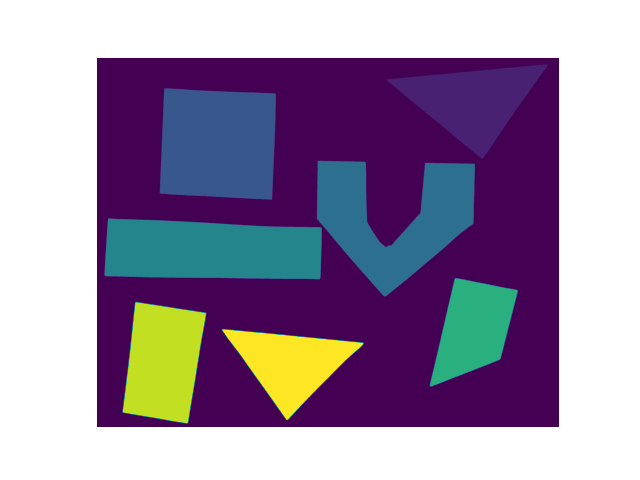

In [220]:
fig, ax = plt.subplots()
plt.imshow(labeled_image)
plt.axis("off")
plt.show()